In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Startups1.csv")

In [3]:
df.head()
df.info()
df.describe(include="all")
df.shape
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           300 non-null    int64 
 1   Company              300 non-null    object
 2   City                 300 non-null    object
 3   Starting Year        300 non-null    int64 
 4   Founders             300 non-null    object
 5   Industries           300 non-null    object
 6   Description          300 non-null    object
 7   No. of Employees     300 non-null    object
 8   Funding Amount in $  300 non-null    int64 
 9   Funding Round        300 non-null    int64 
 10  No. of Investors     300 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 25.9+ KB


np.int64(0)

In [4]:
df['City'].value_counts().head(10)
df['Industries'].value_counts().head(10)
df['Funding Round'].value_counts()

Funding Round
3     47
5     42
4     30
6     30
2     28
7     28
1     20
8     16
9     13
10     9
11     8
12     5
13     5
16     3
14     3
20     3
17     2
15     2
18     1
25     1
24     1
21     1
23     1
0      1
Name: count, dtype: int64

<Axes: xlabel='Funding Amount in $', ylabel='Count'>

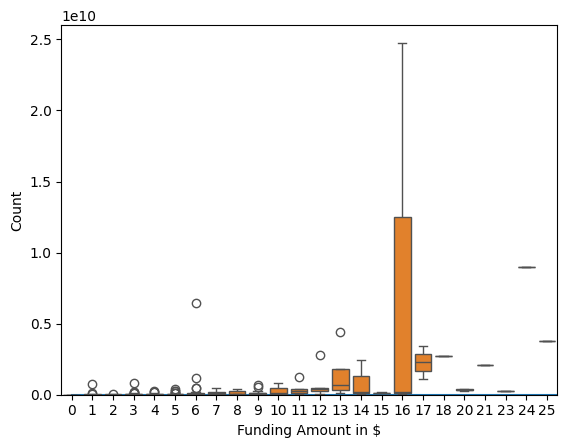

In [5]:
df.groupby('City')['Funding Amount in $'].mean().sort_values(ascending=False).head(10)
sns.histplot(df['Funding Amount in $'], kde=True)
sns.boxplot(x='Funding Round', y='Funding Amount in $', data=df)

<Axes: xlabel='Founders Count', ylabel='Funding Amount in $'>

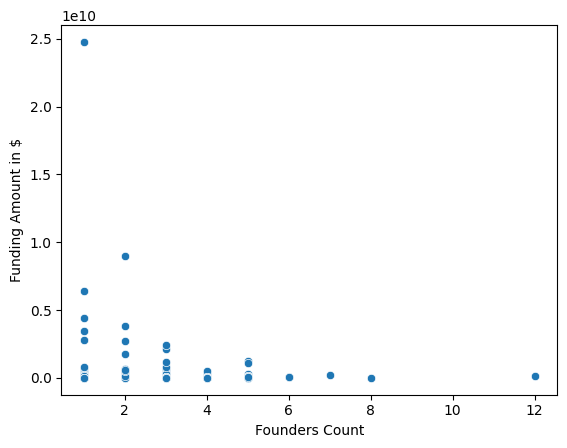

In [6]:
df['Founders Count'] = df['Founders'].apply(lambda x: len(str(x).split(',')))
sns.scatterplot(x='Founders Count', y='Funding Amount in $', data=df)

<Axes: xlabel='City', ylabel='Funding Amount in $'>

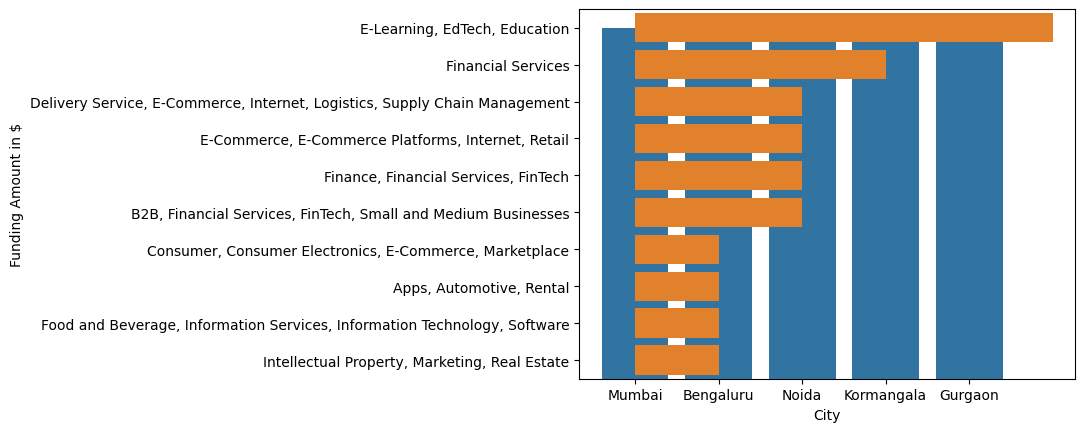

In [7]:
sns.barplot(y='Funding Amount in $', x='City', data=df.sort_values('Funding Amount in $', ascending=False).head(10))
sns.countplot(y='Industries', data=df, order=df['Industries'].value_counts().head(10).index)

In [10]:
df[['Starting Year','No. of Employees','Funding Amount in $']].dtypes

Starting Year           int64
No. of Employees       object
Funding Amount in $     int64
dtype: object

In [11]:
df['No. of Employees'] = df['No. of Employees'].replace('None', pd.NA)
df['No. of Employees'] = df['No. of Employees'].apply(
    lambda x: (int(x.split('-')[0]) + int(x.split('-')[1]))/2 if isinstance(x, str) and '-' in x else pd.to_numeric(x, errors='coerce')
)

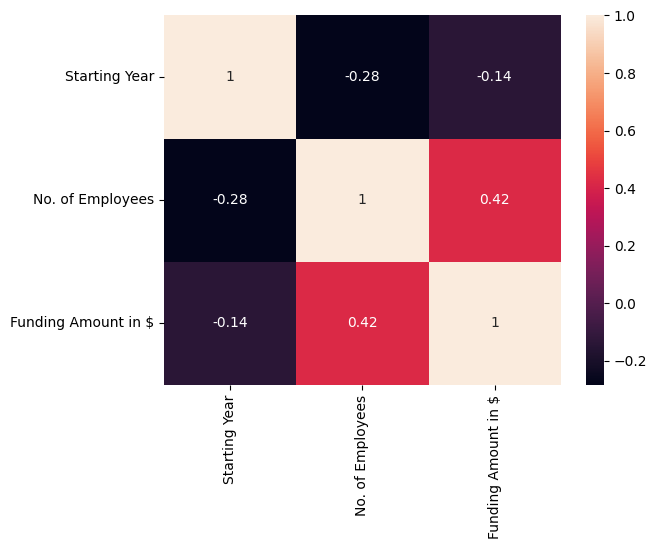

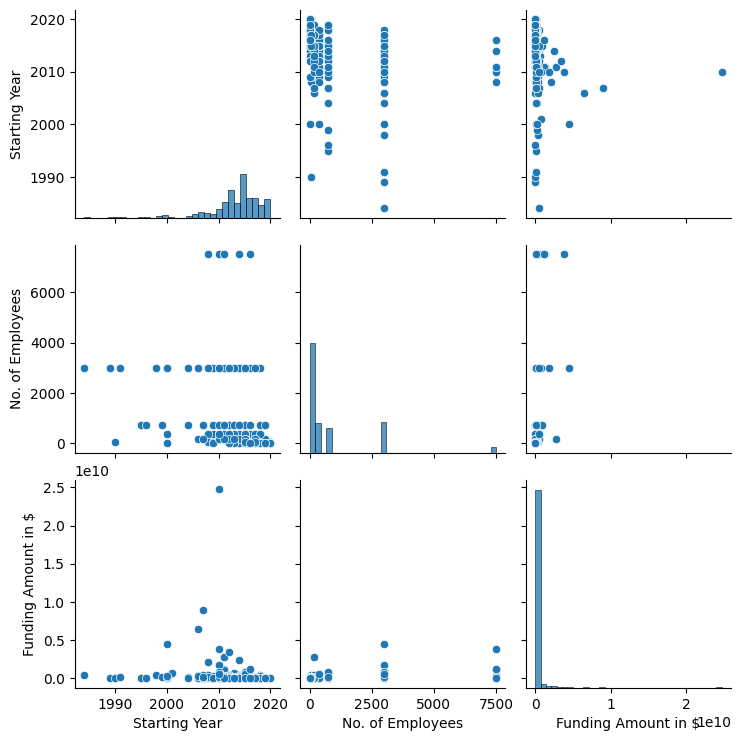

In [13]:
sns.heatmap(df[['Starting Year','No. of Employees','Funding Amount in $']].corr(), annot=True)
sns.pairplot(df[['Starting Year','No. of Employees','Funding Amount in $']])